<a href="https://colab.research.google.com/github/pa0lai/MachineLearning/blob/main/EDA_visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


讀入基本套件 支援MarkDown語法，還有LaTex打數學符號

In [ ]:


%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


畫函數的圖形

$$f(x)=\log(x)$$

In [ ]:
x = np.linspace(.5, 2, 200)

In [ ]:
y = np.log(x)

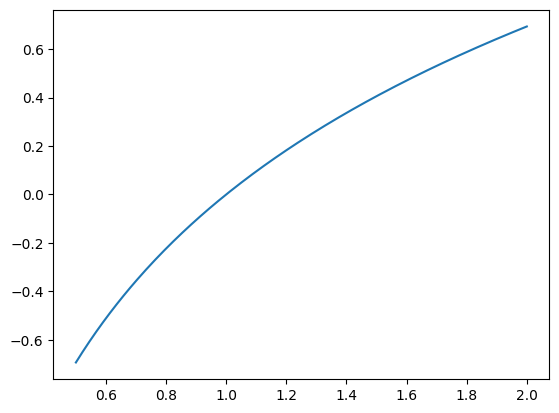

In [ ]:
plt.plot(x, y)

$$f(x)=2 x^2 + 5x - \sin(4x)$$

In [ ]:
x = np.linspace(-10,10, 200)
y = 2*x**2 + 5*x -np.sin(4*x)

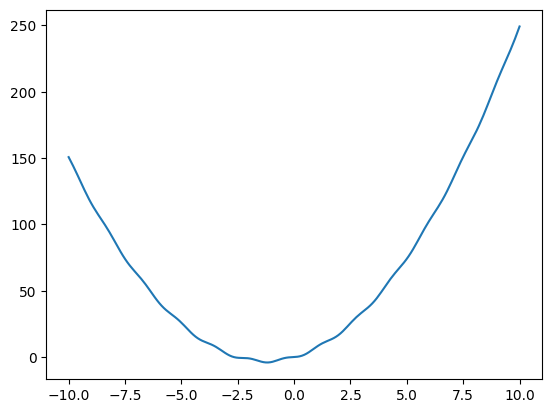

In [ ]:
plt.plot(x,y)

作業如下

$$y=x/\cos x$$

In [ ]:
x = np.linspace(-100,100, 200)
y = x/np.cos(x)

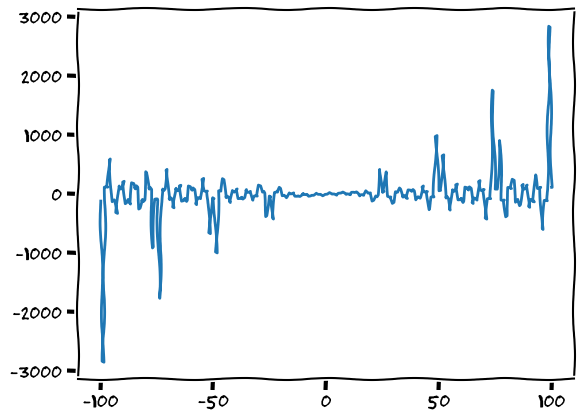

In [ ]:
plt.xkcd()
plt.plot(x,y)